<a href="https://colab.research.google.com/github/Deepika645/100_days_of_code/blob/main/Sample_Code_for_AI_modelling_in_Inventory_Management_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load and Prepare the Data**

In [1]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'date': pd.date_range(start='2023-01-01', periods=100),
    'item': ['item_1', 'item_2', 'item_3'] * 33 + ['item_1'],
    'sales': np.random.randint(1, 100, size=100),
    'price': np.random.uniform(10, 100, size=100),
    'weather': ['Sunny', 'Rainy', 'Cloudy'] * 33 + ['Sunny'],
    'event': ['None', 'Festival', 'Holiday'] * 33 + ['None']
}

df = pd.DataFrame(data)
df.head()


,date,item,sales,price,weather,event
0,2023-01-01,item_1,29,70.080022,Sunny,None
1,2023-01-02,item_2,32,67.175251,Rainy,Festival
2,2023-01-03,item_3,47,78.593242,Cloudy,Holiday
3,2023-01-04,item_1,85,28.843149,Sunny,None
4,2023-01-05,item_2,77,60.116684,Rainy,Festival


**Step 2: Basic Visualizations**

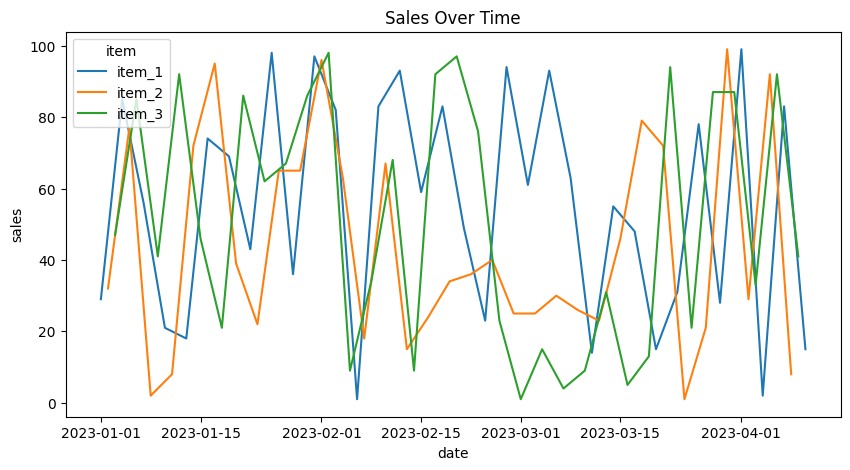

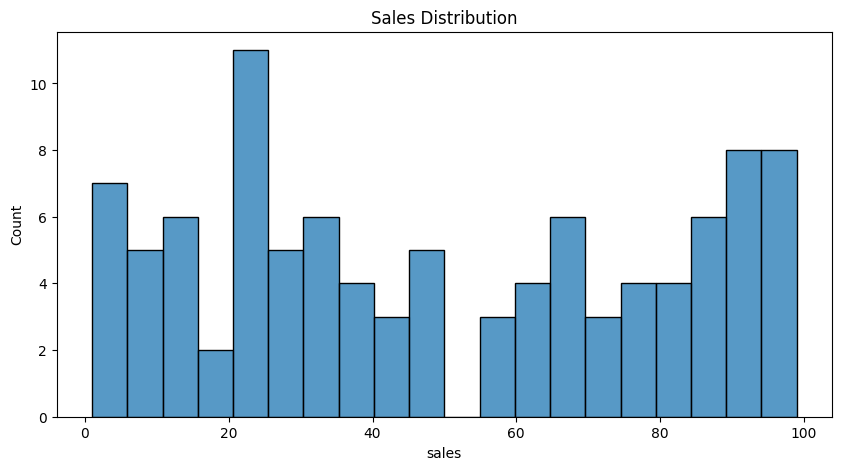

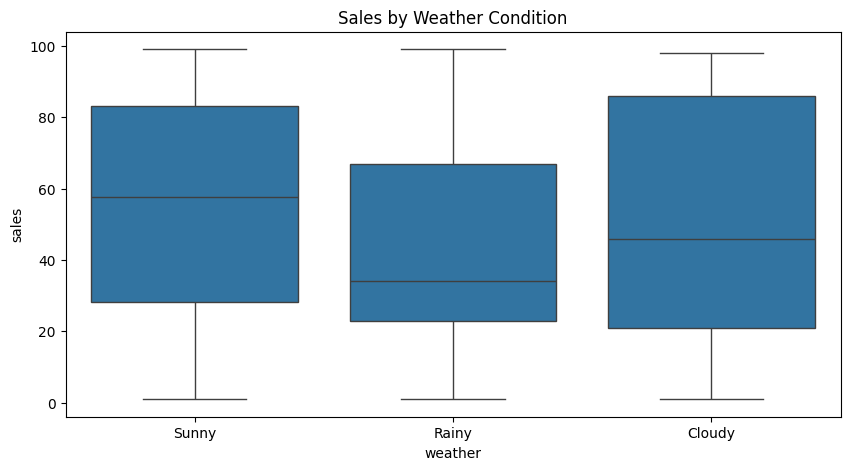

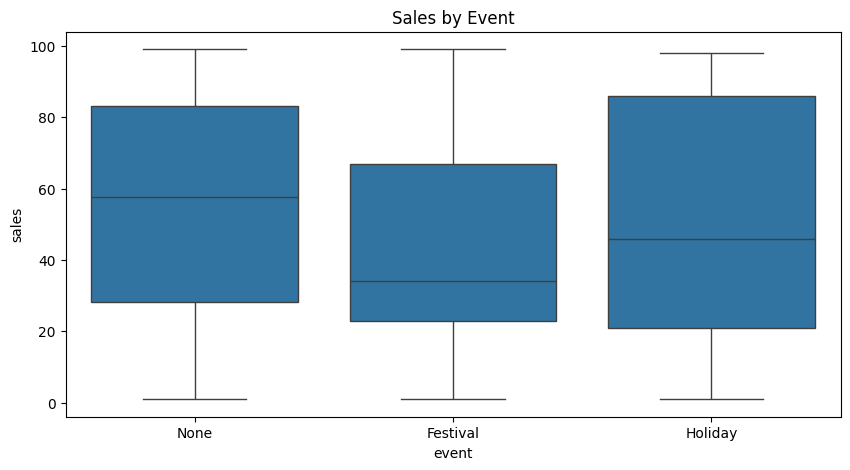

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot of sales
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='sales', hue='item')
plt.title('Sales Over Time')
plt.show()

# Sales distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['sales'], bins=20)
plt.title('Sales Distribution')
plt.show()

# Sales vs. Weather
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='weather', y='sales')
plt.title('Sales by Weather Condition')
plt.show()

# Sales vs. Events
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='event', y='sales')
plt.title('Sales by Event')
plt.show()


**Step 3: Simple Exploratory Data Analysis (EDA)**

                      date       sales       price
count                  100  100.000000  100.000000
mean   2023-02-19 12:00:00   49.960000   52.034178
min    2023-01-01 00:00:00    1.000000   10.466058
25%    2023-01-25 18:00:00   22.750000   32.504252
50%    2023-02-19 12:00:00   46.000000   47.340956
75%    2023-03-16 06:00:00   82.250000   71.159306
max    2023-04-10 00:00:00   99.000000   99.910064
std                    NaN   31.647337   25.396238
date       0
item       0
sales      0
price      0
weather    0
event      0
dtype: int64


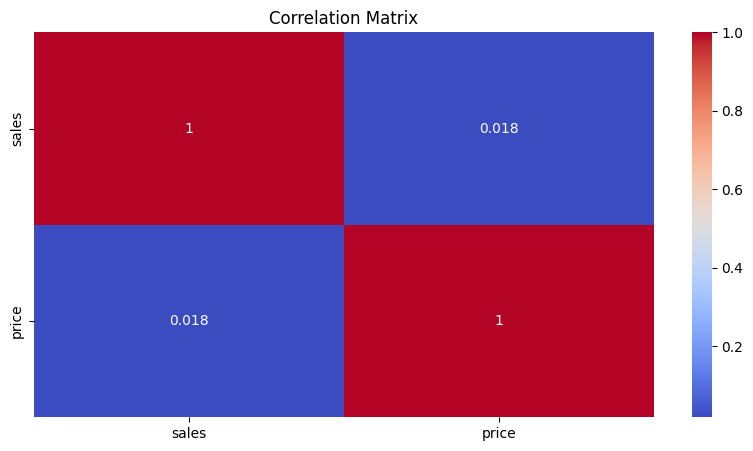

In [4]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Step 4: Machine Learning Modeling for Demand Forecasting**

Train MAE: 26.57861939258321
Test MAE: 31.626150711461218
Train RMSE: 30.452793724538942
Test RMSE: 34.49093021590311


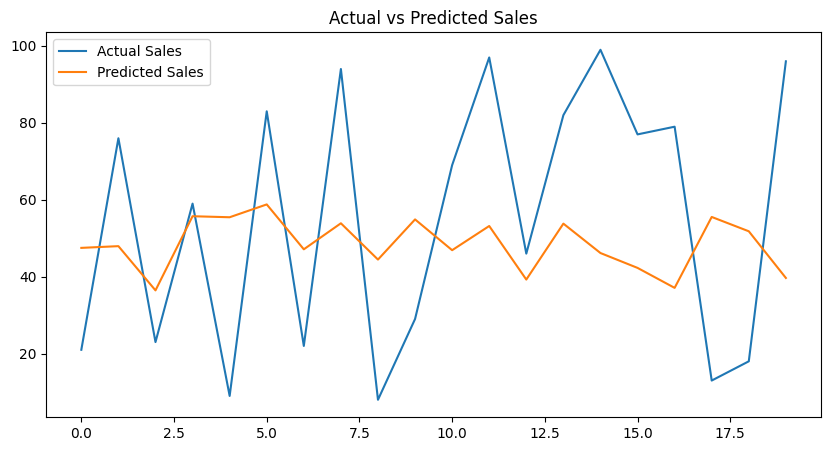

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the data for modeling
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['weather', 'event'], drop_first=True)

# Feature and target variable
X = df_encoded.drop(columns=['sales', 'item'])
y = df_encoded['sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
print('Train MAE:', mean_absolute_error(y_train, y_pred_train))
print('Test MAE:', mean_absolute_error(y_test, y_pred_test))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Plot predictions vs actual sales
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred_test, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
